## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
print(df)

                     DATE         TAG  POSTS
0     2008-07-01 00:00:00          c#      3
1     2008-08-01 00:00:00    assembly      8
2     2008-08-01 00:00:00  javascript    162
3     2008-08-01 00:00:00           c     85
4     2008-08-01 00:00:00      python    124
...                   ...         ...    ...
1986  2020-07-01 00:00:00           r   5694
1987  2020-07-01 00:00:00          go    743
1988  2020-07-01 00:00:00        ruby    775
1989  2020-07-01 00:00:00        perl    182
1990  2020-07-01 00:00:00       swift   3607

[1991 rows x 3 columns]


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
clean_df = df.dropna()
clean_df['POSTS'].max()
clean_df['POSTS'].idxmax()
clean_df['TAG'][1958]

'python'

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
df_top = df.head()
df_bottom = df.tail()
print(df_top, df_bottom)

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124                      DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
clean_df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
clean_df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
length=clean_df['POSTS'].count()
for i in range(0,length):
  print(f"programming language={clean_df['TAG'][i]}, posts={clean_df['POSTS'][i]}")
print(clean_df['TAG'][clean_df['POSTS'].idxmax()])

In [6]:
clean_df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [7]:
clean_df.DATE=pd.to_datetime(clean_df.DATE)
clean_df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [13]:
pivoted_df = clean_df.pivot(index='DATE', columns='TAG', values='POSTS')
pivoted_df.fillna(0, inplace=True)
pivoted_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [10]:
pivoted_df.shape
pivoted_df.head()
pivoted_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [11]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [14]:
pivoted_df.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [30]:
sum = 0.0
pivoted_df.shape[0]
for i in range(0, pivoted_df.shape[0]):
  sum += pivoted_df.groupby('c#').sum()
print(sum)

TAG      assembly         c        c++   delphi       go       java  \
c#                                                                    
3.0           0.0       0.0        0.0      0.0      0.0        0.0   
511.0      1160.0   12325.0    23780.0   2030.0      0.0    32190.0   
1597.0     2610.0   26970.0    91785.0  19430.0      0.0   120640.0   
1649.0     4060.0   46545.0   109475.0  15225.0      0.0   164865.0   
1730.0     2465.0   37555.0   106575.0  20445.0      0.0   138910.0   
...           ...       ...        ...      ...      ...        ...   
15172.0   54375.0  577825.0  1117515.0  71340.0  29725.0  2809810.0   
15248.0   55245.0  615960.0  1160725.0  76125.0  30740.0  2728320.0   
15394.0   49155.0  543460.0  1118965.0  71485.0  43935.0  2721215.0   
15402.0   52780.0  584350.0  1183490.0  56985.0  49590.0  3047900.0   
16265.0   65975.0  664970.0  1261645.0  63945.0  36975.0  3205805.0   

TAG      javascript      perl        php     python         r      ruby  \
c

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

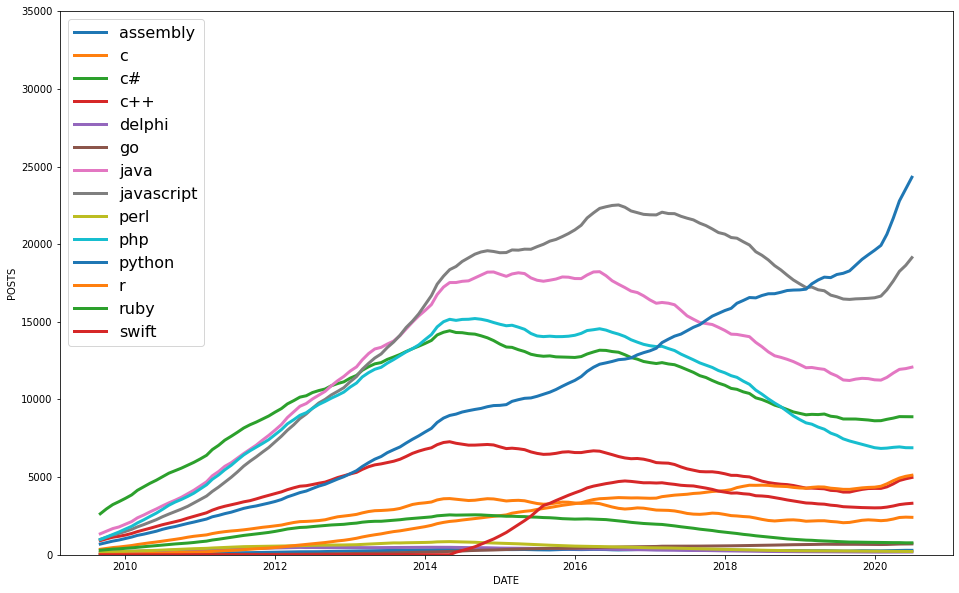

In [56]:
rolled_df = pivoted_df.rolling(window=15).mean()
plt.figure(figsize=(16,10))
plt.xlabel('DATE', fontsize=10)
plt.ylabel('POSTS', fontsize=10)
plt.ylim(0,35000)
# plt.plot(pivoted_df.index,pivoted_df.java, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
# plt.plot(pivoted_df.index, pivoted_df.python, color='red', linestyle='dotted')
for column in rolled_df.columns:
  plt.plot(rolled_df.index, rolled_df[column], label=rolled_df[column].name, linewidth=3)
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 